In [0]:
import torch
import torchvision as tv

Постройте модель для классификации FashionMNIST. Попробуйте получить качество на тестовой выборке не ниже 88%

- попробуйте заменить SGD на Adam и RMSProp. Увеличится ли скорость сходимости?
- попробуйте сделать больше слоев в сети - увеличится ли качество?
- попробуйте добавить регуляризацию, dropout и/или batchnorm-слои. Увеличится ли качество?

In [0]:
import torchvision
import time
import matplotlib.pyplot as plt

In [0]:
#def transform(data):
#    data = torch.tensor(data.getdata(), dtype=torch.float32)
#    return torch.floor(data / 128.).squeeze(axis=-1)

In [0]:
#Fmnist_train = tv.datasets.FashionMNIST('.', train=True, transform=transform, download=True)
#Fmnist_test  = tv.datasets.FashionMNIST('.', train=False, transform=transform, download=True)

Fmnist_train = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
Fmnist_test  = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)

In [0]:
labels_f={0:	'T-shirt/top',
1:	'Trouser',
2:	'Pullover',
3:	'Dress',
4:	'Coat',
5:	'Sandal',
6:	'Shirt',
7:	'Sneaker',
8:	'Bag',
9	:'Ankle boot'}

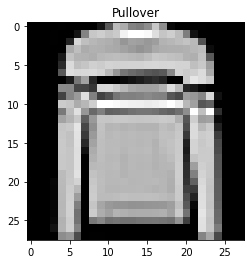

In [21]:
#Fmnist_train[0][0].reshape(28,28)#.shape
i=5
plt.title(labels[Fmnist_train[i][1]])
plt.imshow(Fmnist_train[i][0].numpy().reshape((28,28)), cmap='gray')

In [0]:
#Option III: Five fc layers 0.85 test accuracy
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    
    #torch.nn.Dropout(0.1),
    torch.nn.BatchNorm1d(num_features=784),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),

    torch.nn.BatchNorm1d(num_features=512),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    
    torch.nn.BatchNorm1d(num_features=256),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(256, 150),
    torch.nn.ReLU(),

    torch.nn.BatchNorm1d(num_features=150),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(150, 80),
    torch.nn.ReLU(),

    torch.nn.BatchNorm1d(num_features=80),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(80, 10)
)

loss = torch.nn.CrossEntropyLoss(reduction='sum')
#trainer = torch.optim.Adam(model.parameters(), lr=0.001)
trainer = torch.optim.Adam(model.parameters())

In [0]:
train, test = torch.utils.data.DataLoader(Fmnist_train, 256, shuffle=True), torch.utils.data.DataLoader(Fmnist_test, 256)

In [33]:
num_epochs = 15
for epoch in range(0, num_epochs):
    start, train_loss, train_acc, train_n, test_loss, test_acc, test_n = time.time(), 0., 0., 0, 0., 0., 0
    
    model.train()
    for X, y in train:
        trainer.zero_grad()
        y_hat = model.forward(X)
        l = loss(y_hat, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_hat.argmax(dim=1) == y).sum().item()
        train_n += len(X)
    
    model.eval()
    for X, y in test:
        y_hat = model.forward(X)
        l = loss(y_hat, y)
        test_loss += l.item()
        test_acc += (y_hat.argmax(dim=1) == y).sum().item()
        test_n += len(X)   
        
    print("""epoch {}, taked: {:.3f}
train -> loss: {:.3f}, acc: {:.3f}
test -> loss: {:.3f}, acc: {:.3f}
""".format(epoch, time.time() - start, train_loss / train_n, train_acc / train_n,
       test_loss / test_n, test_acc / test_n))


epoch 0, taked: 16.987
train -> loss: 0.592, acc: 0.800
test -> loss: 0.415, acc: 0.851

epoch 1, taked: 16.766
train -> loss: 0.418, acc: 0.850
test -> loss: 0.378, acc: 0.861

epoch 2, taked: 16.529
train -> loss: 0.383, acc: 0.864
test -> loss: 0.381, acc: 0.862

epoch 3, taked: 16.402
train -> loss: 0.360, acc: 0.870
test -> loss: 0.346, acc: 0.873

epoch 4, taked: 16.701
train -> loss: 0.344, acc: 0.875
test -> loss: 0.332, acc: 0.880

epoch 5, taked: 16.588
train -> loss: 0.329, acc: 0.880
test -> loss: 0.341, acc: 0.876

epoch 6, taked: 16.760
train -> loss: 0.316, acc: 0.884
test -> loss: 0.331, acc: 0.879

epoch 7, taked: 16.602
train -> loss: 0.309, acc: 0.887
test -> loss: 0.319, acc: 0.884

epoch 8, taked: 16.589
train -> loss: 0.301, acc: 0.889
test -> loss: 0.318, acc: 0.887

epoch 9, taked: 16.691
train -> loss: 0.291, acc: 0.893
test -> loss: 0.322, acc: 0.885

epoch 10, taked: 16.512
train -> loss: 0.286, acc: 0.895
test -> loss: 0.314, acc: 0.889

epoch 11, taked: 16.

In [62]:
#y_pred=torch.Tensor([1], dtypes=torch.int64)
y_pred=torch.zeros((1), dtype=torch.int64)
y_true=torch.zeros((1), dtype=torch.int64)
model.eval()
for X, y in test:
  #pass
  y_hat = model.forward(X)
  #print(y_pred.shape, torch.argmax(y_hat, dim=1).shape)
  pred_int=torch.argmax(y_hat, dim=1)
  y_pred=torch.cat((y_pred, pred_int), axis=0)
  y_true=torch.cat((y_true, y), axis=0)
y_pred=y_pred[1:]
y_true=y_true[1:]
len(y_pred), y_pred
#for i in test:
#  print(i[1])

(10000, tensor([9, 2, 1,  ..., 8, 1, 5]))

In [73]:
list(labels.values())

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred  , target_names=list(labels_f.values())))
print(confusion_matrix(y_true, y_pred,))#, labels=list(labels_f.values())))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.81      0.82      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.82      0.82      0.82      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.71      0.72      0.72      1000
     Sneaker       0.95      0.94      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.94      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[[839   1   8  25   2   0 118   0   7   0]
 [  1 967   3  23   3   0   2   0   1   0]
 [ 13   0 807  16  85   0  78   0   1   0]
 [ 16   2   8 912  26   0  30   0   6   0]
 [  1   1  78  37 823   0  56   0   4   0]
 [  0   0   0   0   0 956 

In [0]:
# "T-shirt/top" путается "Shirt"
#конец решения